# Natural Language Processing

## *Workshop 4*  [![Open In Colab](https://github.com/oballinger/QM2/blob/main/colab-badge.png?raw=1)](https://colab.research.google.com/github/oballinger/QM2/blob/main/notebooks/W04.%20Natural%20Language%20Processing.ipynb)

Today we'll be using the *Natural Language Tool Kit* package **nltk**, which will allow us to split (clean) text into words, parts of speech, and sentences, and plot word occurrence and frequency.

**Aims**

- to work with nltk and some standard corpus texts
- to tokenise by word and sentence
- to plot word occurrence and frequency
- to filter by parts of speech

## Background

Exxon Mobil is the 4th largest oil company in the world. In 1978, an Exxon scientist named James Black wrote an [internal briefing](https://insideclimatenews.org/documents/james-black-1977-presentation/) called "The Greenhouse Effect" in which he warned: “Present thinking holds that man has a time window of five to ten years before the need for hard decisions regarding changes in energy strategies might become critical.” 

Rather than acting on this information, Exxon spent the next [forty years aggressively funding climate denial](https://news.harvard.edu/gazette/story/2021/09/oil-companies-discourage-climate-action-study-says/). Recently, [a U.S. court ruled](https://www.theguardian.com/environment/2022/may/24/exxon-trial-climate-crimes-fossil-fuels-global-heating) that ExxonMobil must face trial over accusations that it lied about the climate crisis and covered up the fossil fuel industry’s role in worsening environmental devastation.

### Earnings Calls
Every three months, Exxon conducts an ["earnings call"](https://www.investopedia.com/terms/e/earnings-call.asp); a conference call between the management of a public company, analysts, investors, and the media to discuss the company’s financial results during a given reporting period, such as a quarter or a fiscal year. 

You can [register](https://globalmeet.webcasts.com/starthere.jsp?ei=1488251&tp_key=440e363aaf) to attend their next one if you want! No worries if you miss it, they provide [transcripts](https://corporate.exxonmobil.com/Investors/Investor-relations/Investor-materials-archive#Quarterlyearningsmaterials) on their website.

These transcripts provide an intimate window into the company's 
. We can see how much pressure investors are putting on the company to tackle climate change, and how the company responds. 

We'll be working with transcripts spanning nealry 20 years and over 10 million words; that's like reading the Harry Potter series 10 times. 

![](https://haha.business/business.jpg)


## Downloading the Data
Let's grab the data we will need this week from our course website and save it into our data folder. If you've not already created a data folder then do so using the following command. 

Don't worry if it generates an error, that means you've already got a data folder.

In [229]:
%%capture
!pip install spacy
!pip install textacy
!pip install nltk
!pip install scattertext
!pip install tika

In [211]:
#Make a ./data/wk4 directory
!mkdir data/wk4



mkdir: cannot create directory ‘data/wk4’: File exists


In [419]:
import spacy
import json
import pylab
from IPython.core.display import display, HTML
import nltk
import tika 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

nltk.download('stopwords')
pylab.rcParams['figure.figsize'] = (10., 8.)
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Exxon host earnings calls on their website in PDF form. Usually, working with PDFs is a real pain as they are not machine-readable. Using a python package called [tika](https://www.geeksforgeeks.org/parsing-pdfs-in-python-with-tika/), we can "parse" a pdf, turning it into machine-readable text:

In [213]:
# define the URL where your PDF lives. You could also upload your own pdf.
url='https://corporate.exxonmobil.com/-/media/Global/Files/investor-relations/quarterly-earnings/earnings-transcripts/2022-earnings-transcripts/1Q22-XOM-Earnings-Call-Transcript-4-29-22.pdf'

# parse the pdf by feeding tika the URL and store the text in an object called "raw" 
raw = parser.from_file(url)


2022-10-20 12:45:27,036 [MainThread  ] [INFO ]  Retrieving https://corporate.exxonmobil.com/-/media/Global/Files/investor-relations/quarterly-earnings/earnings-transcripts/2022-earnings-transcripts/1Q22-XOM-Earnings-Call-Transcript-4-29-22.pdf to /tmp/media-global-files-investor-relations-quarterly-earnings-earnings-transcripts-2022-earnings-transcripts-1q22-xom-earnings-call-transcript-4-29-22.pdf.
INFO:tika.tika:Retrieving https://corporate.exxonmobil.com/-/media/Global/Files/investor-relations/quarterly-earnings/earnings-transcripts/2022-earnings-transcripts/1Q22-XOM-Earnings-Call-Transcript-4-29-22.pdf to /tmp/media-global-files-investor-relations-quarterly-earnings-earnings-transcripts-2022-earnings-transcripts-1q22-xom-earnings-call-transcript-4-29-22.pdf.


Now, we have an object called "raw" that contains some useful information. Notice the squiggly brackets; this is a dictionary. It contains several fields, including some useful metadata such as the author

In [214]:
date=raw['metadata']['date']
title=raw['metadata']['dc:title']
raw_text=raw['content']

print('Date: ', date)
print('Title: ', title)
print('Word Count: ', len(raw_text))
print('Text:')
raw_text

Date:  2022-05-04T16:51:56Z
Title:  1Q22 XOM Earnings Call Transcript 4-29-22
Word Count:  58778
Text:


"\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n1Q22 XOM Earnings Call Transcript 4-29-22\n\n\n \n \n\n  1  \n\nExxonMobil First Quarter 2022 Earnings Call Transcript \n\nThis transcript presents ExxonMobil’s first quarter 2022 earnings call held on April 29, 2022. \n\n \n\nOperator: Good day, everyone.  Welcome to this ExxonMobil Corporation First Quarter 2022 \n\nEarnings Call.  Today's call is being recorded.  At this time, I'd like to turn the call over to the Vice \n\nPresident of Investor Relations, Mrs. Jennifer Driscoll.  Please go ahead, ma'am.   \n\n \n\nJennifer Driscoll: Good morning, everyone.  Welcome to our first quarter earnings call.  We appreciate \n\nyour interest in ExxonMobil.  Joining me today are Darren Woods, our Chairman, and Chief \n\nExecutive Officer; and Kathy Mikells, our Senior Vice-President, and Chief Financial Officer.   \n\n \n\n The slides and our prerecorded remarks were made available on our Investor Section o

look at that! we're beginning to give some structure to our text data. But suppose I wanted to analyze multiple earnings calls; I need to organize this data so that it can accomodate new entries. As always, we want to **tabularize** our data. Let's create a dataframe with three columns (Date, Title, and Text) in which each row is one earnings call:

In [215]:
# create a dataframe using the above data 
call=pd.DataFrame({'Date':[date],'Title':[title],'Text':[raw_text]})

# remember, datetime information almost always reaches us as text. 
# we need to explicitly convert it to the datetime data type. 
call['Date']=pd.to_datetime(call['Date'], infer_datetime_format=True)

# Let's see what we've got.
call

,Date,Title,Text
0,2022-05-04 16:51:56,1Q22 XOM Earnings Call Transcript 4-29-22,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...


Now, if we were so inclined, we could use a loop to repeat this process for a large number of earnings calls, yielding a neatly organized dataframe containing the date, title, and text of earnings calls over time. I've done this so you don't have to, and stored it as a file called "Exxon.json". It spans 2002-2019, and contains over 10 million words' worth of earnings calls. Let's take a peek:

In [428]:
df=pd.read_json('data/wk4/Exxon.json')
df

,Title,Date,Text
0,Exxon Mobil Corp at Barclays CEO EnergyPower ...,2019-09-04,Mr. Woods joined ExxonMobil International in 1...
1,Q2 2019 Exxon Mobil Corp Earnings Call - Final,2019-08-02,"NEIL A. HANSEN, VP OF IR & SECRETARY, EXXON MO..."
2,Event Brief of Q2 2019 Exxon Mobil Corp Earn...,2019-08-02,". Neil A. Hansen - Exxon Mobil Corporation,VP ..."
3,Exxon Mobil Corp at JPMorgan Energy Conferenc...,2019-06-18,"So with that, I'll turn it over to you. Thank ..."
4,Exxon Mobil Corp Annual Shareholders Meeting ...,2019-05-29,"DARREN W. WOODS, CHAIRMAN & CEO, EXXON MOBIL C..."
...,...,...,...
177,Event Brief of Q3 2002 Exxon Mobil Corporati...,2002-10-31,OVERVIEW \n\n XOM reported normalized earnings...
178,Q3 2002 Exxon Mobil Corporation Earnings Con...,2002-10-31,"In particular, I refer you to factors affectin..."
179,Q2 2002 Exxon Mobil Corporation Earnings Con...,2002-08-01,Welcome to Exxon Mobil's teleconference and we...
180,Abstract of Q2 2002 Exxon Mobil Corporation ...,2002-08-01,OVERVIEW \n\n XOM: 2Q02 net income was $2.64b....


Great-- we've got a structured dataset of earnings calls. But even though the data has *structure*, the data in the "Text" column still needs some cleaning and processing. 

## Dirty Words

Text often comes 'unclean' either containing tags such as HTML (or XML), or has other issues.
We've already done a bit of tidying, but it's been relatively straightforward. Be cautious when committing to a text analysis project - you may spend a great deal of time tidying up your text. 

For example, you may have noticed "\n\n\n\n\n\n\n\n..." in the text of the first earnings call we downloaded. This is a character (just like "a" or "$") except it indicates that we want to create a new line. It's part of the formatting of the pdf. That's not really useful information to us. Let start by selecting an earnings call; i've chosen the 38th in this dataframe:

In [236]:
call=df.iloc[38]

print('Date: ', call['Date'])
print('Title: ', call['Title'])
print('Word Count: ', len(call['Text']))
print('Text:')
call['Text']

Date:  2016-05-25 00:00:00
Title:  Exxon  Mobil Corp Annual Shareholders Meeting - Final
Word Count:  125746
Text:


'I\'m Rex Tillerson, I\'m the Chairman and Chief Executive Officer of the Exxon Mobil Corporation. And I am pleased to welcome each of you that made the effort to join us today in person. I also, though, want to welcome our shareholders around the world who are joining us by way of the Internet.\n\nI do hope you had the opportunity to meet some of our employees in person while visiting the displays in the foyer this morning. These Exxon Mobil employees are among the over 73,000 people who are working 24 hours a day, seven days a week, 365 days a year on your behalf. And many of them are working in challenging locations to deliver the energy and products needed by consumers around the world.\n\nThe financial and operating results that I bring to you today are really their results, and I have the privilege of presenting them to you on their behalf.\n\nSeated next to me is Jeff Woodbury, Vice President of Investor Relations and our Corporate Secretary. He will assist me in running the mee

This call took place on May 25th, 2016. The transcript is over 125,000 words, nearly as long as the third Lord of the Rings book. It would be a pain to read all of it, so we'll use python to extract insights. Currently, the contents of `call["Text"]` is a ["string"](https://docs.python.org/3/library/stdtypes.html#text-sequence-type-str)-- a sequence of characters. We can do a number of things with strings, including splitting a big string into smaller strings using a specific delimiter and the `.split()` function. For example, I can break down the whole text of the earnings call roughly into sentences by splitting the string every time I encounter a period ("."). This returns a list of smaller strings, and if i select the first one using `[0]`, I get the first sentence of this call:

In [241]:
call['Text'].split('.')[0]

"I'm Rex Tillerson, I'm the Chairman and Chief Executive Officer of the Exxon Mobil Corporation"

Lovely! the first sentence is an introduction by then-CEO [Rex Tillerson](https://en.wikipedia.org/wiki/Rex_Tillerson).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Rex_Tillerson_official_portrait.jpg/800px-Rex_Tillerson_official_portrait.jpg.jpg" alt="drawing" width="200"/>

He was CEO of Exxon from 2006 until he retired on January 1st 2017. One month later, he was sworn in as U.S. Secretary of State under Donald Trump. Let's see what Rex thinks about climate change!

## Regular Expressions (Regex)

Another thing we can do with strings in python is search them using regular expressions. A regular expression is a sequence of characters that specifies a search pattern in text. You can play around building some regex queries using this [tool](https://regexr.com/).

You can think about this as Ctrl+F on steroids; In its simplest form, we can use regex to search for a character, word, or phrase in a bunch of text. For example, we can use regular expressions to count how many times "climate change" is mentioned in this earnings call using the `re.findall()` function: 

In [340]:
# import the regular expressions library 
import re

# use the findall function to search for mentions of "climate change" in the text of our call
climate_change = re.findall(r'climate change', call['Text'], re.IGNORECASE)

# this returns a list of strings matching our search term. 
# the length of the list gives us the number of occurances
len(climate_change)

51

Looks like climate change is mentioned 51 times. 

In [405]:
df['climate change']=df['Text'].apply(lambda x: len(re.findall(r'climate change', x, re.IGNORECASE)))

In [414]:
df['global warming']=df['Text'].apply(lambda x: len(re.findall(r'global warming', x, re.IGNORECASE)))

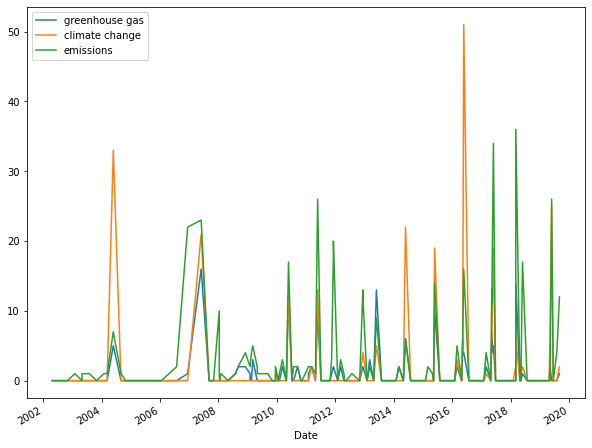

In [426]:
df['Year']=df['Date'].dt.year
yearly=df[['greenhouse gas','climate change','emissions']]
yearly.plot()


Regex can be pretty confusing, but it's also a very powerful tool. Before moving on, let's familiarize ourselves a bit more with regex.

Back to climate change. Now we know the 

In [430]:
re.findall(r"([^.]*climate change[^.]*)"," ".join(df['Text']) )

[' However, as the world looks to lower their carbon emissions and respond to the risk of climate change, there is a desire to better understand how robust our plans are to evolving policies and changing market trends',
 ' Meeting the growing need for energy and addressing the risk of climate change are not mutually exclusive',
 " Over the past year, I've met with policymakers from both sides of the aisle: NGOs, academia, and participated in a climate change dialogue at the Vatican",
 '\n\nOur approach to climate change has 4 components',
 " We don't believe that society has to choose between economic prosperity and reducing the risk of climate change",
 '\n\nRecent steps the company has made in the last month to start to make arrangements for dialogue with the Climate Action 100+ group at independent director level are welcome, but the fact that it has taken so long to get to this point reflects how painfully slow progress has been to date with Exxon on climate change',
 ' I would tel

The earnings call transcript is structured in such a way that it should be possible to separate speakers based on regular expressions. Every time a new person is speaking, they are introduced in the transcript in a new paragraph; Consider the excerpt below: 

```
OPERATOR: Our next question comes from Philip Weiss with Argus Research.

PHILIP WEISS, ANALYST, ARGUS RESEARCH COMPANY: Good morning. I did have one, most of my questions have been answered, but I do have one follow-up on the US. You said that the rig count that's being used for liquids-rich is rising but when I look at production, natural gas as a percentage of your total production has grown, and liquids has actually fallen a little bit. So, I wonder if you can just comment on when we might start to see that trend change?

DAVID ROSENTHAL: Sure. The fall off in the liquids is really just the overall decline in the conventional, as well as some divestments. You'll recall we had a divestment in the Eastern Gulf of Mexico and that had an impact on us year-over-year in particularly in the second half.
In terms of when we'll see significant production growth out of the unconventional, I mentioned some of the increases in percentages, although we haven't given all of the specific production volumes, but we'll do that as we progress.
```

Now, we can't simply split by new line (`\n`); David Rosenthal has two paragraphs. We also can't just split using `:`, since this may appear in the text. Let's describe the features of the names we're looking to split out:

  1. It's a single or group of words 
    * regex: `(\w)` 
  2. The words are all caps, and can contain any characters 
    * regex:`(\w[A-Z])`
  2. There are multiple words, and they can be separated by anything
    * regex: `(\w[A-Z]+.+\w[A-Z])`
  4. The sequence always ends in a colon
    * regex: `(\w[A-Z]+.+\w[A-Z]+:)`

If we plug this into 

In [290]:
re.findall(r'([A-Z]+.+[A-Z]+:)', call['Text'])

['JEFF WOODBURY, VP OF INVESTOR RELATIONS, CORPORATE SECRETARY, EXXONMOBIL CORPORATION:',
 'REX TILLERSON:',
 'REX TILLERSON:',
 'REX TILLERSON:',
 'BETH RICHTMAN, INVESTMENT MANAGER, CALPERS:',
 'REX TILLERSON:',
 'MICHAEL CROSBY, CAPUCHIN FRANCISCAN FRIAR:',
 'REX TILLERSON:',
 'TRACEY REMBERT, SHAREHOLDER, CHRISTIAN BROTHERS INVESTMENT SERVICES:',
 'REX TILLERSON:',
 'MICHAEL GARLAND, ASSISTANT COMPTROLLER FOR CORPORATE GOVERNANCE AND RESPONSIBLE INVESTMENT, OFFICE OF NEW YORK CITY COMPTROLLER:',
 'REX TILLERSON:',
 'TOM SIFFERMAN, REPRESENTATIVE, MOBIL OIL:',
 'REX TILLERSON:',
 'HUGHES JENKINS, EMPLOYEE, UNITED STEELWORKERS:',
 'REX TILLERSON:',
 'NATASHA LAMB, DIRECTOR OF EQUITY RESEARCH, ARJUNA CAPITAL AND BALDWIN BROTHERS:',
 'REX TILLERSON:',
 'PATRICIA DALY, SISTERS OF ST. DOMINIC OF CALDWELL NEW JERSEY:',
 'REX TILLERSON:',
 'PATRICIA DALY:',
 'REX TILLERSON:',
 'EDWARD MASON, SHAREHOLDER, CHURCH COMMISSIONERS FOR ENGLAND:',
 'REX TILLERSON:',
 'DANIELLE FUGERE:',
 'REX TILL

In [305]:
re.split(r'([A-Z]+.+[A-Z]+:)', call['Text'])[9]


'BETH RICHTMAN, INVESTMENT MANAGER, CALPERS:'

The kind of analysis we will be doing reqires *tokenizing* a text, and *tagging* individual words. Tokenizing means splitting the text into individul sentences or individual words, while tagging means classifying each word according to a POS (Parts Of Speech) classification. We can word tokenize our data using the `word_tokenize` function from the `nltk` library, which returns an object which is a list of tokens; if we print the first 19 tokens, we get the first sentence: 

In [218]:
  tokens=nltk.word_tokenize(call['Text'])  
  tokens[:19]

['I',
 "'m",
 'Rex',
 'Tillerson',
 ',',
 'I',
 "'m",
 'the',
 'Chairman',
 'and',
 'Chief',
 'Executive',
 'Officer',
 'of',
 'the',
 'Exxon',
 'Mobil',
 'Corporation',
 '.']

Having tokenized our text, there are a number of useful functions can use to explore it quantitatively. Let's start by counting the number of times "climate" is mentioned:



In [219]:
tokens.count('climate')

76

In [220]:
nltk.Text(tokens).collocations()


REX TILLERSON; climate change; proxy statement; Exxon Mobil; Mr.
Tillerson; voting thereon; resolution concerning; per day; shares
voting; health care; Good morning; New York; Annual Meeting; barrels
per; natural gas; shareholder proposal; global warming; oil
equivalent; last year; York City


In [237]:
#nltk.Text(tokens).concordance('climate change')

['EXXONMOBIL CORPORATION:',
 'REX TILLERSON:',
 'REX TILLERSON:',
 'REX TILLERSON:',
 'CALPERS:',
 'REX TILLERSON:',
 'CAPUCHIN FRANCISCAN FRIAR:',
 'REX TILLERSON:',
 'CHRISTIAN BROTHERS INVESTMENT SERVICES:',
 'REX TILLERSON:',
 'OFFICE OF NEW YORK CITY COMPTROLLER:',
 'REX TILLERSON:',
 'MOBIL OIL:',
 'REX TILLERSON:',
 'UNITED STEELWORKERS:',
 'REX TILLERSON:',
 'ARJUNA CAPITAL AND BALDWIN BROTHERS:',
 'REX TILLERSON:',
 'DOMINIC OF CALDWELL NEW JERSEY:',
 'REX TILLERSON:',
 'PATRICIA DALY:',
 'REX TILLERSON:',
 'CHURCH COMMISSIONERS FOR ENGLAND:',
 'REX TILLERSON:',
 'DANIELLE FUGERE:',
 'REX TILLERSON:',
 'DANIELLE FUGERE:',
 'REX TILLERSON:',
 'REX TILLERSON:',
 'REX TILLERSON:',
 'SHAREHOLDER:',
 'REX TILLERSON:',
 'DAVID RIESMAN:',
 'REX TILLERSON:',
 'MERCY INVESTMENT SERVICES:',
 'REX TILLERSON:',
 'MICHAEL MACCRACKEN:',
 'REX TILLERSON:',
 'GEOLOGIST:',
 'REX TILLERSON:',
 'RENEE BOUCHARD:',
 'REX TILLERSON:',
 'UNION OF CONCERNED SCIENTISTS:',
 'REX TILLERSON:',
 'KATHY MU

In [222]:
from nltk import bigrams

finder = BigramCollocationFinder.from_words(tokens)
bigram_measures = nltk.collocations.BigramAssocMeasures()
print(finder.nbest(bigram_measures.pmi, 2))

[('1,000', 'academics'), ('1,400', 'Gulf')]


In [223]:
def tokenize(raw_text):
  tokens=nltk.word_tokenize(raw_text)
  text=nltk.Text(tokens)
  return text

df['Text']=df['Text'].apply(lambda x: tokenize(x))

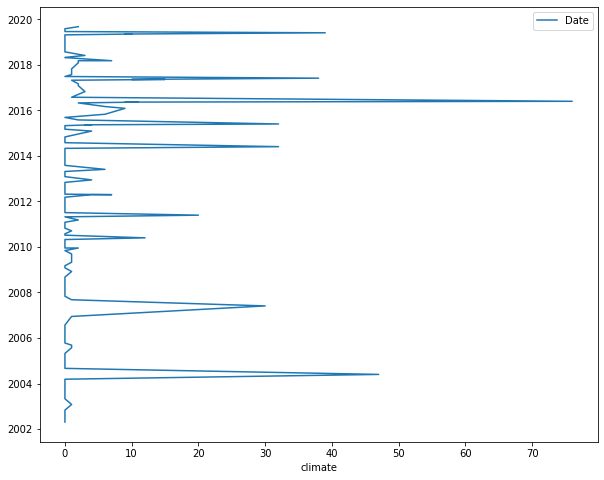

In [224]:
df['climate']=df['Text'].apply(lambda x: x.count('climate'))
df.plot('climate')

In [225]:
call=df.iloc[38]

text=call['Text']
#tokens=nltk.word_tokenize(raw_text)
#text=nltk.Text(tokens)

word_fd = nltk.FreqDist(filtered_sentence)

text.concordance('climate')
print(text.count('climate change'))

text.dispersion_plot(['climate'])

NameError: ignored

## Scatter Text

In [ ]:
ceo_df=df[30:40]
ceo_df['CEO']=np.where(ceo_df['Date']>'01-01-2017','Woods','Tillerson')

import scattertext as st

corpus = st.CorpusFromPandas(ceo_df,
                             category_col='CEO',
                             text_col='Text',
                             nlp=nlp).build()

In [ ]:
corpus=corpus.remove_terms(nlp.Defaults.stop_words, ignore_absences=True)


In [ ]:
html = st.produce_scattertext_explorer(
                   corpus,
                   category='Woods',
                   category_name='Woods',
                   not_category_name='Tillerson',
                   width_in_pixels=1000)

display(HTML(html))

In [ ]:
df['Text']=df['Text'].str.split('\n\n')
paragraphs=df.explode('Text')
paragraphs

In [ ]:
paragraphs['speaker']=paragraphs['Text'].str.split(':').str[0]
paragraphs

In [ ]:
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)
matcher.add("cc", [nlp("carbon capture")])
matches = matcher(doc)

ix=matches[0]

doc[ix[1]-10:ix[2]+10]

In [ ]:
from spacy.matcher import PhraseMatcher

phrase_matcher = PhraseMatcher(nlp.vocab)
phrase_list = [nlp('climate change')]
phrase_matcher.add("Text Extractor", None, *phrase_list)
matched_items = phrase_matcher(doc)

matched_text = []

for match_id, start, end in matched_items:
    text = nlp.vocab.strings[match_id]
    span = doc[start: end]
    matched_text.append(span.sent)

matched_text

In [ ]:
displacy.render(matched_text[1], jupyter=True)

In [ ]:
import textacy.extract

kwic=textacy.extract.kwic.keyword_in_context(doc, 'global warming')

for a in kwic:
  print(a)


In [ ]:
from spacy import displacy
displacy.render(sentences[1], jupyter=True)

In [ ]:
from collections import Counter, defaultdict

def find_character_occurences(doc):
    """
    Return a list of actors from `doc` with corresponding occurences.
    
    :param doc: Spacy NLP parsed document
    :return: list of tuples in form
        [('elizabeth', 622), ('darcy', 312), ('jane', 286), ('bennet', 266)]
    """
    
    characters = Counter()
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            characters[ent.lemma_] += 1
            
    return characters.most_common()

print(find_character_occurences(doc)[:20])

In [ ]:
text.dispersion_plot(['Grail','rabbit','Knights','Ni','castle'])

In [ ]:
for token in doc:
    print(token.text, token.pos_, token.ent_)

## Dirty Words

Text often comes 'unclean' either containing tags such as HTML (or XML), or has other issues, but fortunately we will be using 'clean' sources, at least initially. Be cautious when committing to a text analysis project - you may spend a great deal of time tidying up your text.

The kind of analysis we will be doing reqires *tokenizing* a text, and *tagging* individual words. Tokenizing means splitting the text into individul sentences or individual words, while tagging means classifying each word according to a POS (Parts Of Speech) classification. 

## The Castle of Aaargh
We will first experiment with nltk and its built in corpus texts. We'll work with some Monty Python, beloved of comedy bores for half a century

## Setup

- install nltk through package manager, or the command line
- import nltk
- type nltk.download('book'). This will automatically download the books into our workspace

In [ ]:
#nltk: natural language processing toolkit
import nltk

In [ ]:
#Download the sample books
nltk.download('book')

Now, we import the sample texts. You'll notice that text6 is "Monty Python and the Holy Grail", as promised. Presumably this was compiled pre-*Spamalot*.

In [ ]:
#Import all features from nltk.book
from nltk.book import *

Let's look at the object text6; we can look at the first few words..

In [ ]:
#View the first ten words of text6
text6[1:10]

Which are presumably stage directions rather than dialogue. How many words/symbols are in the text?

In [ ]:
#View the length of the list
len(text6)

Bear in mind that a lot of the functions we will carry out rely on this being a text object - we'll start to think about how we use free text and convert it to a **Text** object later.

We can now start to do some slightly more sophisticated work; for example, a dispersion plot to see where words appear. Let's give it a few keywords that those familiar with *...The Holy Grail* might recognise:

In [ ]:
text6.dispersion_plot(['Grail','rabbit','Knights','Ni','castle'])

And we can easily count *how many* times a word appears.

In [ ]:
text6.count('Ni')

Or the words which most commonly appear together:

In [ ]:
text6.collocations()

## Exercise: From Hell's Heart I Stab at Thee
From Moby Dick, find out 
- Where the narrator Ishmael, Captain Ahab and his Nemesis are mentioned. When do each enter the story? Where do they have most emphasis?
- Which parts of the books appear to take place at sea, and points where their ship is wrecked or sinking (spoilers)
- two significant places in the story (HINT: use collocations)

Let's now look at carrying out the full process of importing and working with text data. 

## Making an IMPACT

As part of the REF2014 exercise, universities reported on the *Impact* their research activities had on the world. Their *Impact Case Studies* were subsequently made available by HEFCE. What sort of information do they contain? How do universities frame "impact"? All of this data is available via the REF website.

A little context: I've included examples from the four *panels* used by HEFCE. Broadly speaking, Panel A is health, bioscience and medicine, B is physical science and engineering, C is social science, and D is humanities - the full categories are visible here: 
http://www.ref.ac.uk/panels/unitsofassessment/

Let's first look at random sample from Panel A:

In [ ]:
#Data path to file
data_path = "./data/wk7/PanelA.txt"

with open(data_path) as file:
    data = file.read()
print(data)

We could tokenize this into sentences:

In [ ]:
sentences = nltk.sent_tokenize(data)
sentences[1:5]

Or into individual words; generally, it may be useful to retain sentences, so we can see where two words are in the same sentence, for example - but we'll be doing something simpler:

In [ ]:
tokens = nltk.word_tokenize(data)

In [ ]:
tokens[1:20]

Tokenising is a process which has many subtleties and corner-cases, and you may want to proceed in a more fine-grained way for some texts:

http://nltk.org/api/nltk.tokenize.html

Let's now convert this into a Text object, which will allow us to analyse other aspects of the text. For example, we can look at **collocations**, words which commonly appear together. This may help to provide context.

In [ ]:
simple_text = nltk.Text(tokens)
simple_text.collocations()

We can create a dispersion plot - although in this case, it tells us a limited amount...

In [ ]:
simple_text.dispersion_plot(['NHS', 'evidence', 'practice', 'Hospital'])

Even from this, we get a sense of the work this unit does, and its impacts on the world. But what are the most 20 common words used? To find this out, we produce a **Freq**uency **Dist**ribution (*FreqDist*) object. This has an implicit loop - the *for* statement is telling python to look through all the words in 'tokens' and seeing how often they occur. The .lower() command converts them all to lower case for comparison, so it will flag up upper *and* lower case occurrences of the word.

In [ ]:
fd = nltk.FreqDist(word.lower() for word in tokens)
fd.plot(20)

Not very helpful - this includes all kinds of junk, and tells us that "and" is very common. Not very interesting. Let's try a bit harder and identify Parts of Speech.

## POS

Parts of speech indicate whether something is a noun, a verb, adjective, and so on. In nltk, we can use the *pos_tag* command, which will identify which word belongs to which part of speech.

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[0:10]

'NNP' refers to Proper Noun, Singular; you can find the full list of Parts of Speech here: http://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [ ]:
permitted_tags = set([
    'NN',
    'NNS'
])

## One FOR All
We've so far managed to avoid this staple of programming, the FOR loop - and we're not going to delve too deeply into it in the last class of term. Of course, you probably came across FOR loops and IF statements when you worked through the prerequisites for the module, but that feels like a long time ago... 

We do use FOR and IF here, and it's worth understanding a bit about what it means, even if you don't intend to use it a lot yourself. In the next piece of code, we set up *fd*, a new object which will record frequency distribution information. Then we use a FOR loop

`for bit in tagged:
    ...'

This goes through every element of tagged one at a time - and each element is called 'bit' for the purposes of this loop. Then, for each 'bit', we check that it has one of the permitted tags, and make sure it's at least 3 characters long - shorter words probably aren't all that relevant in this case:

`if bit[1] in permitted_tags and len(bit[0])>2:'

note that the *and* means both of these have to be true - if both *are* true, only then does the following statement execute:

`fd[bit[0]] = fd[bit[0]] + 1'

which increases the count for that word. So, this code increases the count for a word iff (if and only if) its at least 3 characters long, and it's of the correct tag (Noun, Singular or Plural).

## Double Indentity
One final remark: we haven't dealt with **indents** much in python, but indenting the code like below, after the for statement, and *again* after the if statement, is the way that python knows it's dealing with a loop (for) and a conditional (if). It's also the way python deals with defining new functions, but that's not something you will need to do. This is just a pointer - if your code doesn't work, check the colons are there (:) and the indenting is too.

On with the show - as promised, this creates a word frequency graph of nouns:

In [ ]:
fd = nltk.FreqDist()

for bit in tagged:
    if bit[1] in permitted_tags and len(bit[0])>2:
        fd[bit[0]] = fd[bit[0]] + 1
        
fd.plot(20)

We start to get a sense of the impact - 'care', 'practice', and 'services' all feature heavily.

Let's now look at another randomly chosen example from Panel A:

In [ ]:
data_path = "./data/wk7/PanelA2.txt"

with open(data_path) as file:
    data = file.read()

tokens = nltk.word_tokenize(text)
simple_text.collocations()
simple_text = nltk.Text(tokens)
tagged = nltk.pos_tag(tokens)
fd = nltk.FreqDist()

for bit in tagged:
    if bit[1] in permitted_tags and len(bit[0])>2:
        fd[bit[0]] = fd[bit[0]] + 1
        
fd.plot(20)

A very different set of words, clearly geared towards language therapy, and working directly with patients. Perhaps if we looked at the *slightly* less common words, we'd see links between these submissions -  for example, we see *communication* appearing in both. Not a huge surprise, if we're talking about public impact, but students of the public role of the university might start to wonder about the distinctions between *communication* and *engagement*.

## Exercise
Repeat this for the examples from Panels B, C and D - what trends and keywords appear? What use do the collocations have? What do different parts of speech (e.g. verbs or proper nouns) tell you about the text?

If we wanted to analyse the sector as a whole, we would want to analyse Impact statements en masse - and we would hope that this would draw out links across differnt statements from different centres and universities, and even in different panels.

## Working with larger text datasets
Working with larger text corpora starts to get slow. At this point, we will look at a body of text we have previously tagged up.  The file is "The Nameless City" by H. P. Lovecraft, a horror author from the early 20th century.

In [ ]:
import pickle
import requests
from urllib.request import urlopen

This may take a little while - so wait for the task to run:

In [ ]:
# Loading the tokenized and tagged file. 
tagged = pickle.load(urlopen("https://s3.eu-west-2.amazonaws.com/qm2/wk7/lovecraft_tagged.pickle"), encoding='latin1')

#How many sentences do we have?
len(tagged)

This is tokenised by sentence - and there are 18,513 of them. That would have taken a long time to tag up. If you're interested, this is how you take a set of *sentences* and tag them with Part of Speech:

In [ ]:
exampleSentences = nltk.sent_tokenize(data)
  
exampleTagged = [nltk.pos_tag(nltk.word_tokenize(sent)) for sent in sentences]

Note that the second line is running an implicit for loop through every sentence, and tagging each word.

In [ ]:
# first sentence.
exampleTagged[0]

An impressive start! Let's again build our word frequency chart. Note now that we have an extra layer of FOR - we need to look at each sentence in the text; at each word in each sentence; and then check each word to see whether it is of an allowed type.

In [ ]:
fd = nltk.FreqDist()

permitted_tags = set([
    'JJS',
    'FW',
    'NN',
    'NNS',
    'NNP',
    'NNPS',
    'UH',
])
for sentence in tagged:
    for word in sentence:
        if word[1] in permitted_tags:
                fd[word[0]] = fd[word[0]] + 1
fd.plot(20)

Now that we've produced counts for all words which conform to our list of tags, we can quickly see how frequently common words appear; because we have tokenized by sentence, we have to do this with a slightly different mechanism - run through the words of interest and see how many occurrences appear in the Frequency Distribution object, fd. Again, we're sneaking in a FOR loop to run through these.

In [ ]:
for word in ['space', 'nameless', 'mad', 'dread', 'fear', 'cthulhu', 'necronomicon', 'caring']:
    print(word, fd[word])

So far, we've completely avoided the use of pandas - but we can put this data into a pandas dataframe very easily, and use the built-in graphing methods to change the style of our graph. 

We feed in fd.keys() - the words - and fd.values(), the wordcount.

In [ ]:
#Convert to list so subscriptable
list(fd.keys())[1:10]

In [ ]:
#Convert to list so subscriptable
list(fd.values())[1:10]

In [ ]:
import pandas as pd

#Convert to list for use in creating dataframe
df = pd.DataFrame({'items': list(fd.keys()), 'counts': list(fd.values())})
df.head()

Let's now arrange them in order of appearance - the most common at the top.

In [ ]:
df = df.sort_values(by='counts',ascending=False)
df.head()

We now have a DataFrame with certain word tags sorted by decreasing frequency. Let's plot this in a bar graph; we will use df[1:50] to select the most common 50 words.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('ggplot')
df[1:50].plot(kind='bar', x='items', y='counts', legend=False)
plt.xlabel('Word')
plt.ylabel('Word Count')
plt.title('Word counts for H.P. Lovecraft\'s \"The Nameless City\"')
plt.axhline(df['counts'].mean(), color='#2222ff')

## Exercise
What is the percentage of words that appear exactly once in the entire text? (Hint : FreqDist objects have a method called 'hapaxes')

## Exercise
The words of our ex Prime Minister, David Cameron:

    1. Select one of Cameron's speeches.
    2. Sentence and word tokenize it.
    3. POS tag it.
    4. Create noun and adjective histograms of the 20 most frequent words.
    (notice that there are several POS for each.)
    5. Create dispersion plots for these nouns and adjectives. 
    6. What is the percentage of words that are adjectives in the speech?

In [ ]:
# read a raw text from a remote location. 
speech = requests.get('https://s3.eu-west-2.amazonaws.com/qm2/wk7/speeches/cameron-leaders-speech-2006a.txt').text

### Speeches

https://s3.eu-west-2.amazonaws.com/qm2/wk7/speeches/cameron-election-victory-speech-2010.txt  
https://s3.eu-west-2.amazonaws.com/qm2/wk7/speeches/cameron-leaders-speech-2006a.txt  
https://s3.eu-west-2.amazonaws.com/qm2/wk7/speeches/cameron-leaders-speech-2006b.txt  
https://s3.eu-west-2.amazonaws.com/qm2/wk7/speeches/cameron-leaders-speech-2007.txt  
https://s3.eu-west-2.amazonaws.com/qm2/wk7/speeches/cameron-leaders-speech-2008.txt  
https://s3.eu-west-2.amazonaws.com/qm2/wk7/speeches/cameron-leaders-speech-2013.txt  
https://s3.eu-west-2.amazonaws.com/qm2/wk7/speeches/cameron-leaders-speech-2012.txt  
https://s3.eu-west-2.amazonaws.com/qm2/wk7/speeches/cameron-leaders-speech-2011.txt  
https://s3.eu-west-2.amazonaws.com/qm2/wk7/speeches/cameron-leaders-speech-2010.txt  
https://s3.eu-west-2.amazonaws.com/qm2/wk7/speeches/cameron-leaders-speech-2009.txt  

In [ ]:
speech